In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 0. Read data

In [2]:
df = pd.read_csv('../data/spotify_clean.csv')

In [3]:
df.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,Very Low,99.373
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,Very Low,137.373
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,Very Low,170.267
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,Very Low,152.427
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,Very Low,82.625


In [4]:
df.columns

Index(['Unnamed: 0', 'genre', 'artist_name', 'track_name', 'track_id',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity_class',
       'duration_s'],
      dtype='object')

## 0.1 Drop the useless columns

- Drop *genre, artist_name, track_name, track_id, popularity*

In [5]:
df.dtypes

Unnamed: 0            int64
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
popularity_class     object
duration_s          float64
dtype: object

In [6]:
df = df.drop(columns=['Unnamed: 0', 'genre', 'artist_name', 'track_name', 'track_id','popularity'])

### 0.2 Transform categorical variables

In [7]:
#key
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
215235,0.01660,0.492,0.820,0.000003,4,0.0949,-4.425,Major,0.0518,80.167,4/4,0.549,Low,197.590
193029,0.00307,0.760,0.888,0.000015,1,0.1490,-3.449,Major,0.1240,115.705,4/4,0.559,Medium,210.686
176676,0.56600,0.678,0.675,0.005250,4,0.0653,-6.286,Major,0.0340,123.758,4/4,0.934,Low,273.573
137269,0.09490,0.816,0.710,0.000000,4,0.1750,-5.184,Major,0.1340,82.008,4/4,0.724,Low,235.613
77884,0.02130,0.759,0.651,0.000165,3,0.1800,-8.317,Major,0.0565,92.023,4/4,0.471,Medium,226.587


In [8]:
# mode
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
39029,0.13800,0.4780,0.897,0.657000,4,0.100,-6.554,1,0.0471,113.018,4/4,0.1860,Low,2764.934
30727,0.96400,0.0863,0.193,0.321000,5,0.122,-14.046,0,0.0364,169.255,3/4,0.0463,Very Low,90.160
100322,0.03090,0.2320,0.895,0.000003,10,0.129,-5.449,0,0.1010,175.744,4/4,0.6030,Low,310.387
152905,0.00991,0.6620,0.655,0.000191,5,0.142,-7.878,0,0.0389,109.972,4/4,0.2910,Medium,178.933
78549,0.00384,0.6350,0.908,0.083400,0,0.239,-4.795,0,0.0563,110.012,4/4,0.6370,Medium,190.448


In [9]:
#time signature
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df.sample(5)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
99408,0.000989,0.349,0.995,0.00000,3,0.0955,-2.622,1,0.1430,189.936,0,0.223,Medium,158.533
218579,0.027300,0.447,0.504,0.00000,8,0.1420,-9.155,1,0.0293,141.939,2,0.104,Low,411.685
130765,0.978000,0.361,0.131,0.01270,5,0.0893,-19.845,0,0.0460,108.214,2,0.178,Low,329.120
64720,0.835000,0.496,0.511,0.11300,11,0.1140,-12.092,1,0.0356,94.732,0,0.570,Low,226.152
134194,0.681000,0.713,0.585,0.00194,4,0.1900,-9.338,1,0.1560,140.322,0,0.921,Low,222.120


In [10]:
df.dtypes

acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
popularity_class     object
duration_s          float64
dtype: object

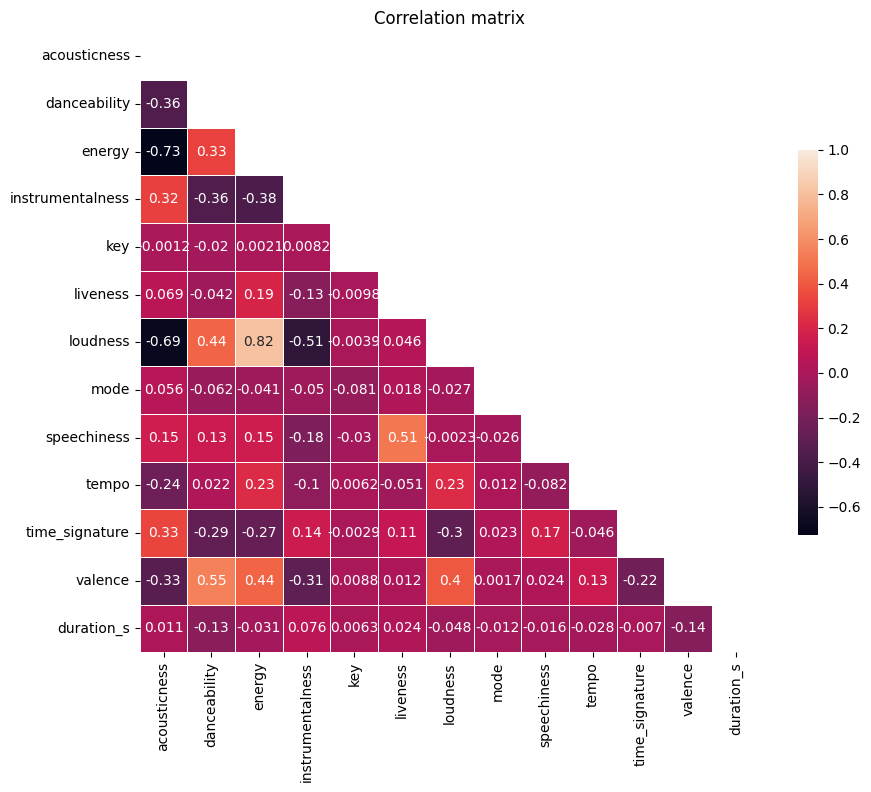

In [11]:
corr=df.drop(columns=['popularity_class']).corr()
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation matrix')
plt.show()

## 1. Perfom Train Test Split

In [12]:
X = df.drop(columns=["popularity_class"], axis = 1)
y = df["popularity_class"]

In [13]:
X

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,0.61100,0.389,0.910,0.000000,0,0.3460,-1.828,1,0.0525,166.969,0,0.814,99.373
1,0.24600,0.590,0.737,0.000000,1,0.1510,-5.559,0,0.0868,174.003,0,0.816,137.373
2,0.95200,0.663,0.131,0.000000,2,0.1030,-13.879,0,0.0362,99.488,1,0.368,170.267
3,0.70300,0.240,0.326,0.000000,0,0.0985,-12.178,1,0.0395,171.758,0,0.227,152.427
4,0.95000,0.331,0.225,0.123000,3,0.2020,-21.150,1,0.0456,140.576,0,0.390,82.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,8,0.0845,-10.626,1,0.0316,115.542,0,0.962,326.240
232720,0.03290,0.785,0.683,0.000880,5,0.2370,-6.944,0,0.0337,113.830,0,0.969,282.447
232721,0.90100,0.517,0.419,0.000000,8,0.0945,-8.282,1,0.1480,84.135,0,0.813,166.960
232722,0.26200,0.745,0.704,0.000000,10,0.3330,-7.137,1,0.1460,100.031,0,0.489,222.442


In [14]:
y

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
            ...   
232719         Low
232720         Low
232721         Low
232722         Low
232723         Low
Name: popularity_class, Length: 232724, dtype: object

### 1.1 Balance class

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Apply SMOTE
smote = SMOTE(sampling_strategy={"High": 10000, "Top": 5000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After apply subsample
under = RandomUnderSampler(sampling_strategy={"Low": 50000, "Medium": 50000}, random_state=42)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

# Create new balanced dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['popularity_class'] = y_resampled

# Verify balance
print(df_resampled['popularity_class'].value_counts())

popularity_class
Low         50000
Medium      50000
Very Low    45877
High        10000
Top          5000
Name: count, dtype: int64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_22032\376486752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_counts.index, y=popularity_counts.values, palette="viridis")


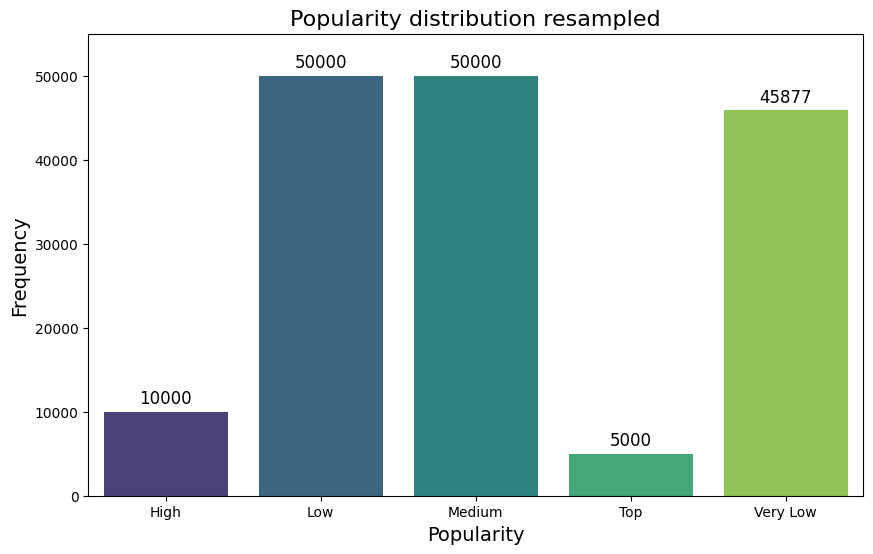

In [16]:
popularity_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_counts.index, y=popularity_counts.values, palette="viridis")
plt.title("Popularity distribution resampled", fontsize=16)
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim((0,55000))

for i, value in enumerate(popularity_counts.values):
    plt.text(i, value + (max(popularity_counts.values) * 0.02),  # Ajusta el espacio dinámicamente
             str(value), ha='center', fontsize=12)
    
plt.show()

### 1.2 Separate train and test data

In [17]:
features = df.drop(columns=['popularity_class'])
target = df['popularity_class']

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [19]:
X_train

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
81486,0.98000,0.3340,0.221,0.003990,11,0.1220,-17.479,1,0.0963,77.662,0,0.244,229.200
72431,0.84500,0.6630,0.326,0.301000,9,0.1110,-10.944,1,0.0652,170.141,0,0.510,73.000
175810,0.87400,0.6440,0.433,0.000000,5,0.8710,-14.049,0,0.9420,85.827,2,0.470,251.034
152608,0.55500,0.6350,0.691,0.000000,2,0.0970,-4.862,1,0.2580,82.142,0,0.638,217.419
188271,0.00505,0.5040,0.926,0.011500,10,0.8720,-5.846,0,0.0501,106.986,0,0.232,220.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,0.95500,0.4920,0.133,0.650000,2,0.3940,-14.821,1,0.0548,124.087,2,0.426,239.267
117952,0.03440,0.8380,0.412,0.000234,8,0.1590,-7.148,1,0.2890,75.044,0,0.166,185.707
173685,0.82000,0.5840,0.371,0.000000,3,0.2650,-18.916,0,0.9380,87.051,2,0.579,103.320
43567,0.08690,0.6910,0.567,0.150000,11,0.0276,-11.624,0,0.0515,116.705,0,0.942,316.307


In [20]:
y_train

81486     Very Low
72431     Very Low
175810    Very Low
152608      Medium
188271    Very Low
            ...   
176963         Low
117952      Medium
173685    Very Low
43567       Medium
199340         Low
Name: popularity_class, Length: 186179, dtype: object

In [21]:
X_test

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
134848,0.00792,0.861,0.6050,0.269000,4,0.0555,-10.104,1,0.1430,129.844,0,0.817,170.295
43959,0.25900,0.820,0.3720,0.000000,10,0.0880,-12.085,1,0.0874,109.632,0,0.871,205.733
135390,0.19800,0.791,0.5750,0.000006,10,0.0827,-12.167,1,0.0754,80.925,0,0.847,252.933
104126,0.95700,0.461,0.0609,0.000000,4,0.1140,-29.027,1,0.0798,94.687,0,0.458,144.640
58631,0.98200,0.368,0.3820,0.010500,3,0.3240,-13.974,0,0.0983,106.018,0,0.274,320.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53098,0.46800,0.751,0.4670,0.000088,3,0.0511,-9.295,1,0.0314,118.159,0,0.935,259.267
61551,0.20300,0.561,0.5050,0.470000,8,0.3260,-13.184,1,0.0513,105.185,0,0.652,219.073
193671,0.01950,0.623,0.8240,0.130000,1,0.0491,-8.971,0,0.0479,111.356,0,0.574,279.933
231200,0.15400,0.787,0.5050,0.000034,10,0.1220,-5.129,0,0.3160,89.896,0,0.741,221.595


In [22]:
y_test

134848         Low
43959          Low
135390         Low
104126    Very Low
58631          Low
            ...   
53098          Low
61551          Low
193671      Medium
231200         Low
208652         Low
Name: popularity_class, Length: 46545, dtype: object

### 1.3 Normalization

In [23]:
normalizer = MinMaxScaler()

#Fit to our training data
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,0.983936,0.297286,0.221205,0.003994,1.000000,0.113427,0.622373,1.0,0.078596,0.222483,0.0,0.244,0.039070
1,0.848394,0.650252,0.326313,0.301301,0.818182,0.102319,0.738652,1.0,0.045609,0.657629,0.0,0.510,0.010528
2,0.877510,0.629868,0.433422,0.000000,0.454545,0.869740,0.683404,0.0,0.975605,0.260902,0.5,0.470,0.043059
3,0.557229,0.620212,0.691685,0.000000,0.181818,0.088183,0.846871,1.0,0.250106,0.243563,0.0,0.638,0.036917
4,0.005070,0.479670,0.926925,0.011512,0.909091,0.870750,0.829362,0.0,0.029593,0.360463,0.0,0.232,0.037510


In [24]:
joblib.dump(normalizer, 'normalizer.pkl')

['normalizer.pkl']

In [25]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_s
0,0.007952,0.862676,0.605598,0.269269,0.363636,0.046278,0.753599,1.0,0.128129,0.468018,0.0,0.817,0.028306
1,0.260040,0.818689,0.372360,0.000000,0.909091,0.079095,0.718350,1.0,0.069156,0.372913,0.0,0.871,0.034782
2,0.198795,0.787576,0.575567,0.000006,0.909091,0.073743,0.716891,1.0,0.056428,0.237837,0.0,0.847,0.043406
3,0.960843,0.433537,0.060942,0.000000,0.363636,0.105349,0.416896,1.0,0.061095,0.302592,0.0,0.458,0.023618
4,0.985944,0.333762,0.382370,0.010511,0.272727,0.317399,0.684739,0.0,0.080717,0.355908,0.0,0.274,0.055776


### 1.4 Apply PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
pca = PCA(n_components=0.90)
X_train_norm = pca.fit_transform(X_train_norm)
X_test_norm = pca.transform(X_test_norm)

In [28]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

[0.27574067 0.25774632 0.11749175 0.0988863  0.06871859 0.06120427
 0.03161959]


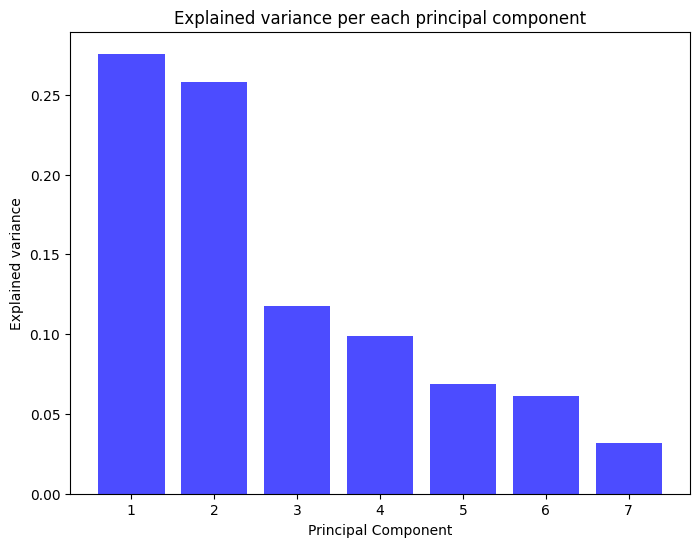

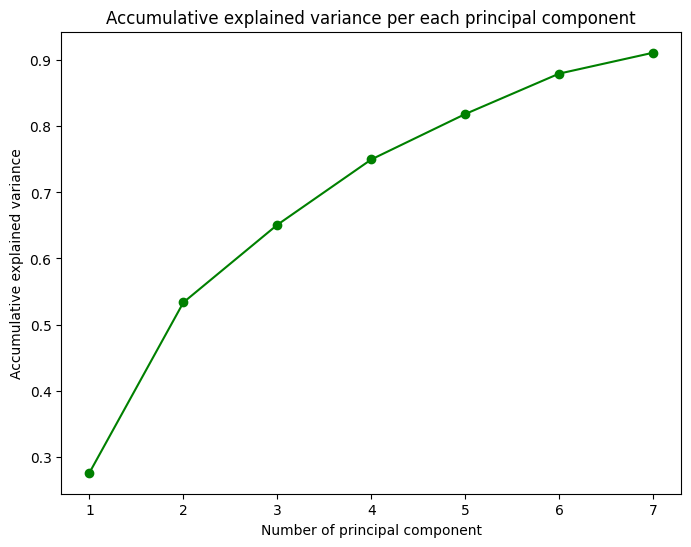

In [29]:
# Visualize the varianze explained per variable
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.title('Explained variance per each principal component')
plt.show()

# Accumulative percentage:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of principal component')
plt.ylabel('Accumulative explained variance')
plt.title('Accumulative explained variance per each principal component')
plt.show()


In [30]:
print(f'Number of selected components: {pca.n_components_}')

Number of selected components: 7


In [31]:
features.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_s'],
      dtype='object')

In [32]:
# Obtening component information
variable_name = features.columns

for i, component in enumerate(pca.components_): 
    print(f"\n {i + 1} Component:") 
    for j, variable in enumerate(variable_name): 
        print(f"{variable}: {component[j]:.4f}")


 1 Component:
acousticness: 0.5347
danceability: -0.1968
energy: -0.3782
instrumentalness: 0.2663
key: -0.0520
liveness: -0.0106
loudness: -0.1466
mode: 0.5990
speechiness: -0.0109
tempo: -0.0580
time_signature: 0.1132
valence: -0.2489
duration_s: 0.0021

 2 Component:
acousticness: -0.3650
danceability: 0.1275
energy: 0.2724
instrumentalness: -0.2833
key: -0.0826
liveness: 0.0244
loudness: 0.1107
mode: 0.7909
speechiness: 0.0020
tempo: 0.0515
time_signature: -0.0781
valence: 0.2051
duration_s: -0.0025

 3 Component:
acousticness: -0.0242
danceability: -0.0253
energy: 0.0027
instrumentalness: 0.0191
key: 0.9923
liveness: -0.0289
loudness: 0.0003
mode: 0.0988
speechiness: -0.0534
tempo: 0.0115
time_signature: -0.0086
valence: 0.0116
duration_s: 0.0005

 4 Component:
acousticness: -0.4772
danceability: -0.1458
energy: 0.0339
instrumentalness: 0.6267
key: -0.0654
liveness: -0.3484
loudness: 0.0013
mode: 0.0529
speechiness: -0.4260
tempo: 0.0628
time_signature: -0.1052
valence: -0.1795
du

## 2. Apply ML Models

### 2.1 k-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def knn_model(number_of_neighbours): 
    
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=number_of_neighbours)
    knn.fit(X_train_norm, y_train)

    # predictions
    y_pred = knn.predict(X_test_norm)

    # classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()

    # ROC Curve
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)

    # Obtain the probabilities per each class
    y_prob = knn.predict_proba(X_test_norm)

    # Calculathe roc curve per each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graph
    plt.figure(figsize=(10, 8))

    for i in range(len(lb.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for multiclasses classification')
    plt.legend(loc='lower right')
    plt.show()


Accuracy: 0.5886
Precision: 0.5866
Recall: 0.5886
F1 Score: 0.5839

Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.53      0.45       564
         Low       0.60      0.63      0.61     21362
      Medium       0.60      0.66      0.63     15315
         Top       0.50      0.32      0.39        19
    Very Low       0.55      0.38      0.45      9285

    accuracy                           0.59     46545
   macro avg       0.53      0.50      0.51     46545
weighted avg       0.59      0.59      0.58     46545



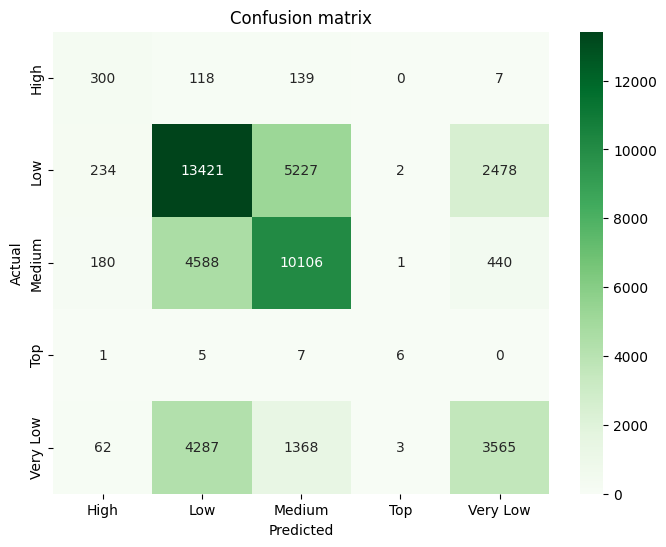

k = 3  || R^2 = 0.5886346546352992
Accuracy: 0.5684
Precision: 0.5690
Recall: 0.5684
F1 Score: 0.5590

Classification Report:
               precision    recall  f1-score   support

        High       0.31      0.40      0.35       564
         Low       0.57      0.68      0.62     21362
      Medium       0.58      0.57      0.57     15315
         Top       0.33      0.16      0.21        19
    Very Low       0.56      0.31      0.40      9285

    accuracy                           0.57     46545
   macro avg       0.47      0.42      0.43     46545
weighted avg       0.57      0.57      0.56     46545



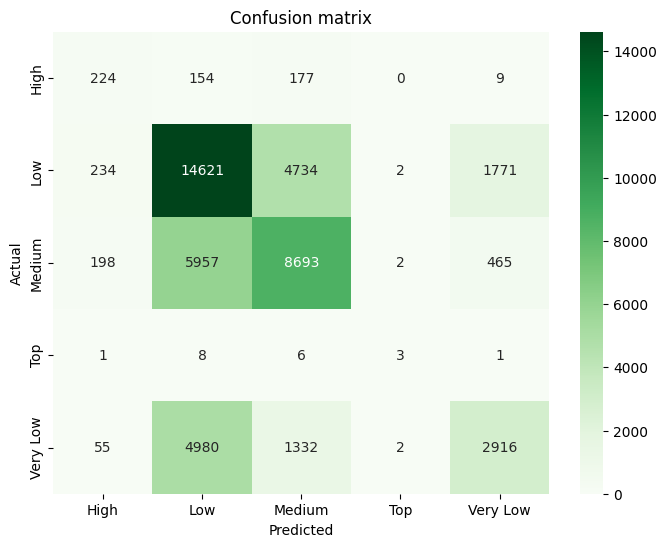

k = 4  || R^2 = 0.5684176603287141
Accuracy: 0.5661
Precision: 0.5682
Recall: 0.5661
F1 Score: 0.5605

Classification Report:
               precision    recall  f1-score   support

        High       0.26      0.27      0.27       564
         Low       0.57      0.64      0.60     21362
      Medium       0.56      0.60      0.58     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.60      0.36      0.45      9285

    accuracy                           0.57     46545
   macro avg       0.40      0.38      0.38     46545
weighted avg       0.57      0.57      0.56     46545



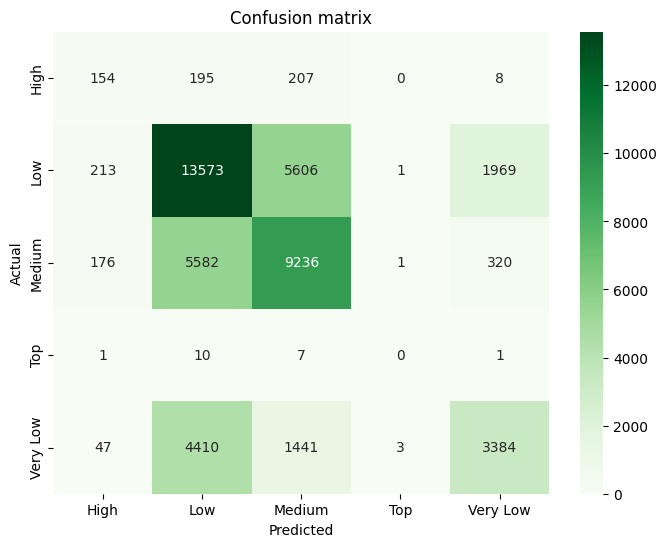

k = 5  || R^2 = 0.5660543559995703
Accuracy: 0.5583
Precision: 0.5613
Recall: 0.5583
F1 Score: 0.5499

Classification Report:
               precision    recall  f1-score   support

        High       0.22      0.21      0.21       564
         Low       0.56      0.68      0.61     21362
      Medium       0.56      0.54      0.55     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.60      0.33      0.43      9285

    accuracy                           0.56     46545
   macro avg       0.39      0.35      0.36     46545
weighted avg       0.56      0.56      0.55     46545



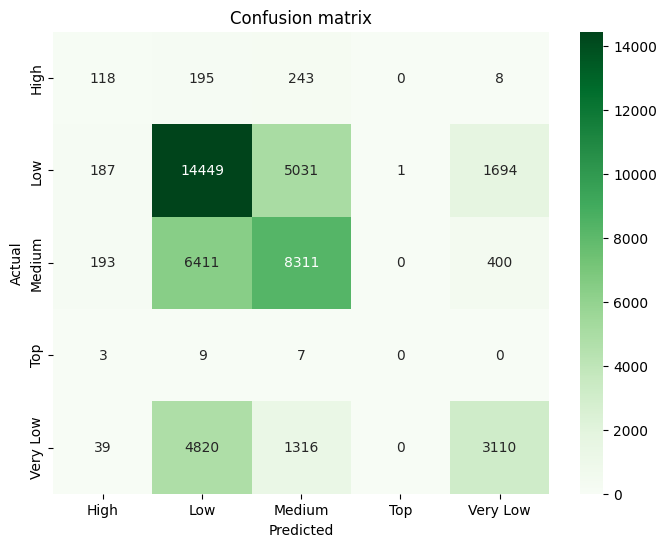

k = 6  || R^2 = 0.5583413900526373
Accuracy: 0.5586
Precision: 0.5596
Recall: 0.5586
F1 Score: 0.5528

Classification Report:
               precision    recall  f1-score   support

        High       0.18      0.12      0.14       564
         Low       0.56      0.64      0.60     21362
      Medium       0.55      0.58      0.56     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.60      0.37      0.46      9285

    accuracy                           0.56     46545
   macro avg       0.38      0.34      0.35     46545
weighted avg       0.56      0.56      0.55     46545



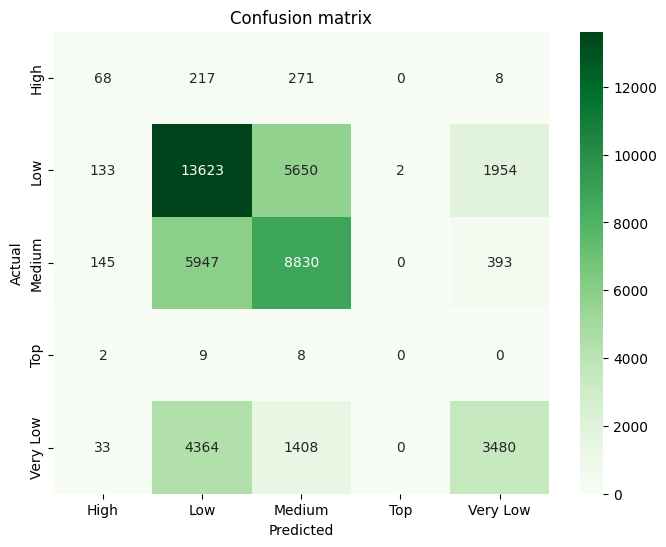

k = 7  || R^2 = 0.5586206896551724
Accuracy: 0.5540
Precision: 0.5569
Recall: 0.5540
F1 Score: 0.5452

Classification Report:
               precision    recall  f1-score   support

        High       0.17      0.09      0.12       564
         Low       0.55      0.66      0.60     21362
      Medium       0.54      0.55      0.54     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.61      0.34      0.44      9285

    accuracy                           0.55     46545
   macro avg       0.38      0.33      0.34     46545
weighted avg       0.56      0.55      0.55     46545



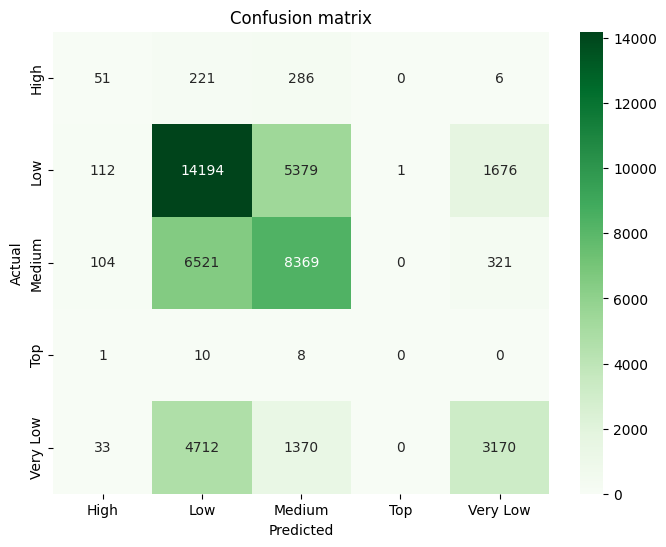

k = 8  || R^2 = 0.553958534751316


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5547
Precision: 0.5568
Recall: 0.5547
F1 Score: 0.5482


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

        High       0.19      0.09      0.12       564
         Low       0.56      0.64      0.60     21362
      Medium       0.54      0.56      0.55     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.61      0.37      0.46      9285

    accuracy                           0.55     46545
   macro avg       0.38      0.33      0.35     46545
weighted avg       0.56      0.55      0.55     46545



C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


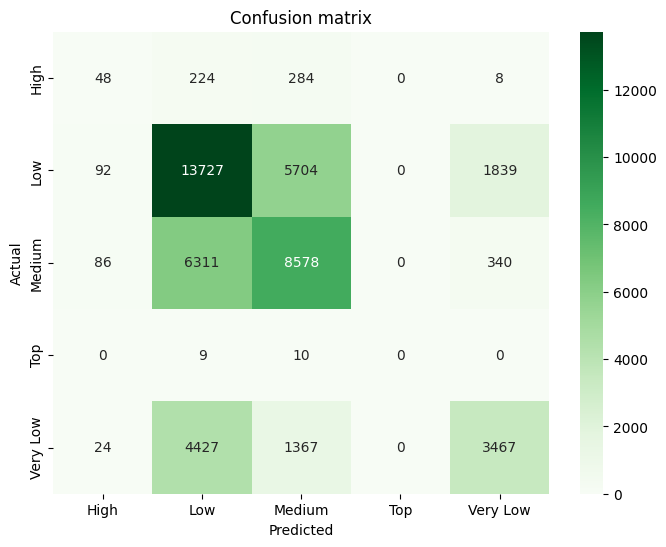

k = 9  || R^2 = 0.5547319798044903


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5510
Precision: 0.5532
Recall: 0.5510
F1 Score: 0.5425


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi


Classification Report:
               precision    recall  f1-score   support

        High       0.20      0.06      0.10       564
         Low       0.55      0.66      0.60     21362
      Medium       0.53      0.54      0.54     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.61      0.35      0.45      9285

    accuracy                           0.55     46545
   macro avg       0.38      0.32      0.34     46545
weighted avg       0.55      0.55      0.54     46545



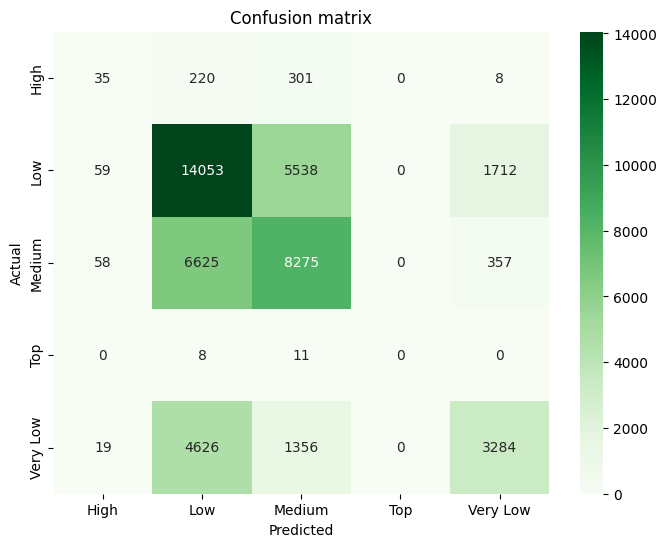

k = 10  || R^2 = 0.5510151466322913


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5539
Precision: 0.5562
Recall: 0.5539
F1 Score: 0.5462


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

        High       0.15      0.04      0.06       564
         Low       0.55      0.65      0.60     21362
      Medium       0.53      0.55      0.54     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.63      0.37      0.46      9285

    accuracy                           0.55     46545
   macro avg       0.37      0.32      0.33     46545
weighted avg       0.56      0.55      0.55     46545



C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


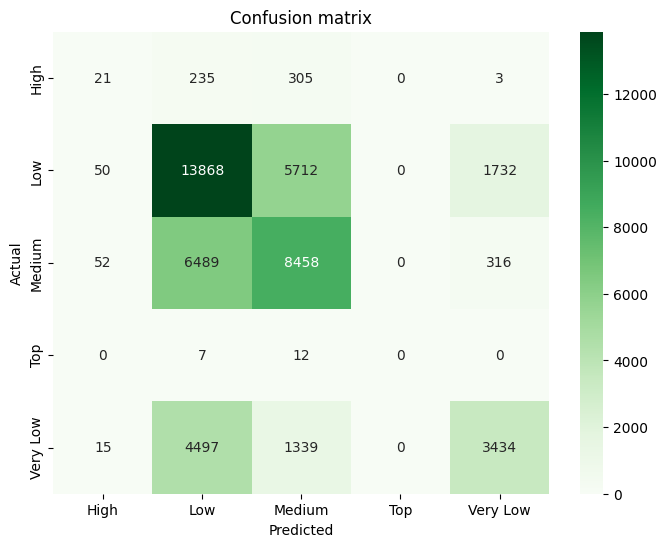

k = 11  || R^2 = 0.5538940809968848


In [35]:
l = []
for i in range(3,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm, y_train)
    r2 = knn.score(X_test_norm, y_test)
    l.append(r2)
    
    y_pred = knn.predict(X_test_norm)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()
        
        
    print(f"k = {i}  || R^2 = {r2}")

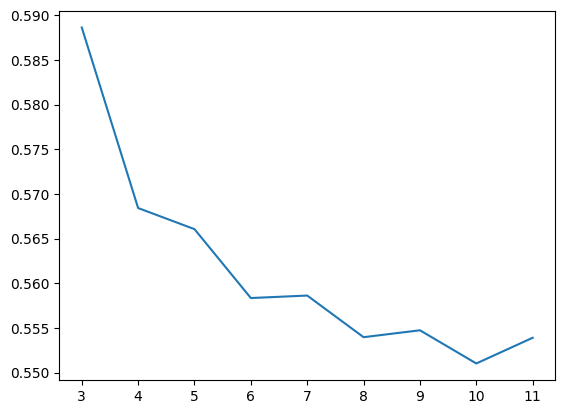

In [36]:
plt.plot(list(range(3,12)), l)

Accuracy: 0.5886
Precision: 0.5866
Recall: 0.5886
F1 Score: 0.5839

Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.53      0.45       564
         Low       0.60      0.63      0.61     21362
      Medium       0.60      0.66      0.63     15315
         Top       0.50      0.32      0.39        19
    Very Low       0.55      0.38      0.45      9285

    accuracy                           0.59     46545
   macro avg       0.53      0.50      0.51     46545
weighted avg       0.59      0.59      0.58     46545



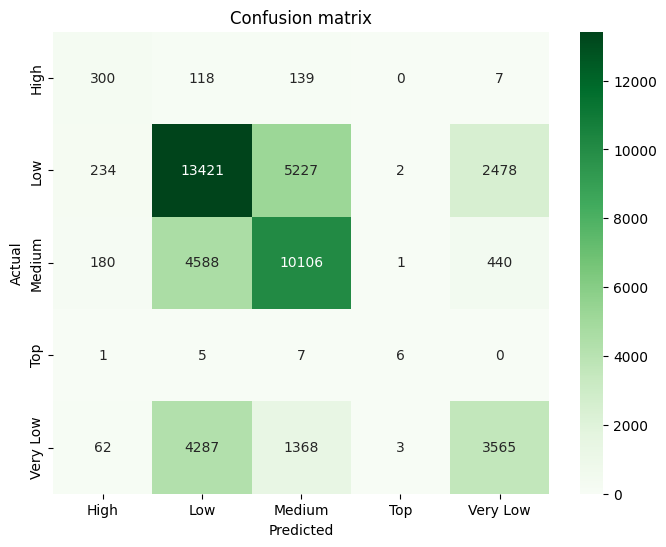

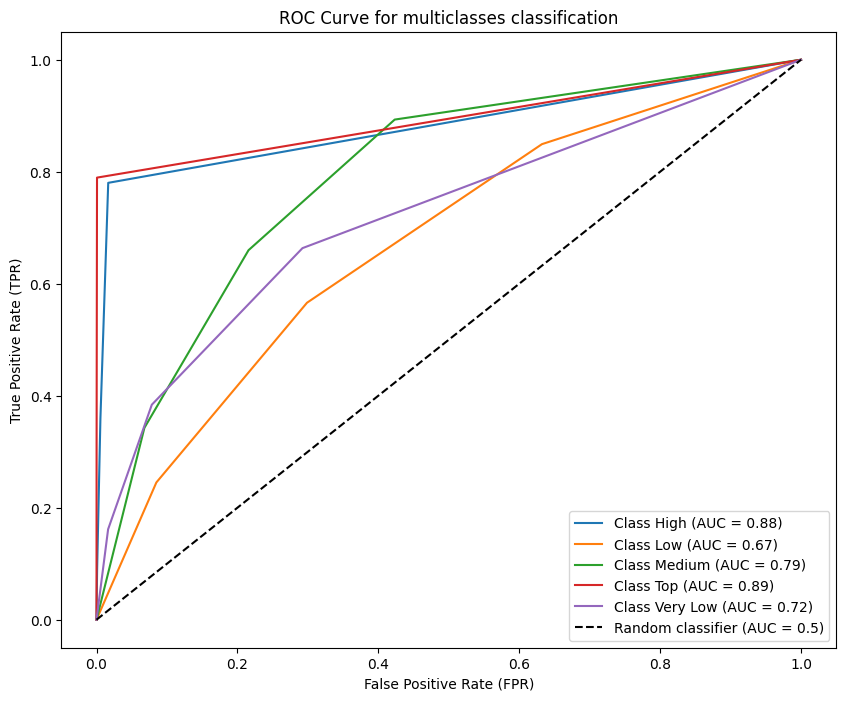

In [37]:
knn_model(3)

###  2.2 Logic Regression

C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5291
Precision: 0.5374
Recall: 0.5291
F1 Score: 0.5146


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       564
         Low       0.52      0.67      0.59     21362
      Medium       0.51      0.50      0.50     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.65      0.29      0.40      9285

    accuracy                           0.53     46545
   macro avg       0.34      0.29      0.30     46545
weighted avg       0.54      0.53      0.51     46545



C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


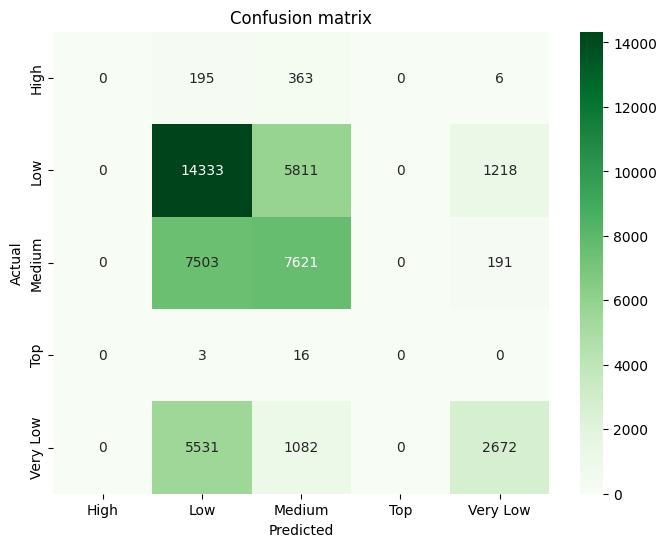

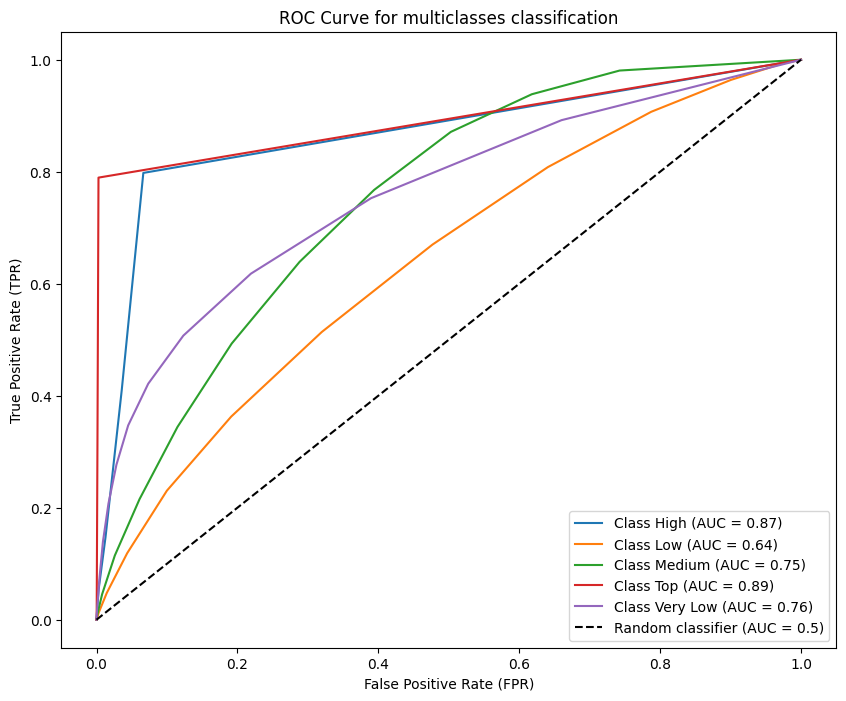

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
model = LogisticRegression(max_iter=1000)

# Adjust the model
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)

# Calculate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for multiclasses classification')
plt.legend(loc='lower right')
plt.show()



### 2.3 Random Forest

In [39]:
y_test.value_counts()

popularity_class
Low         21362
Medium      15315
Very Low     9285
High          564
Top            19
Name: count, dtype: int64

In [40]:
y_train.value_counts()

popularity_class
Low         85883
Medium      61331
Very Low    36592
High         2285
Top            88
Name: count, dtype: int64

Accuracy: 0.7064
Precision: 0.7083
Recall: 0.7064
F1 Score: 0.6977

Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.62      0.76       564
         Low       0.67      0.79      0.72     21362
      Medium       0.76      0.78      0.77     15315
         Top       0.91      0.53      0.67        19
    Very Low       0.69      0.41      0.51      9285

    accuracy                           0.71     46545
   macro avg       0.80      0.62      0.69     46545
weighted avg       0.71      0.71      0.70     46545



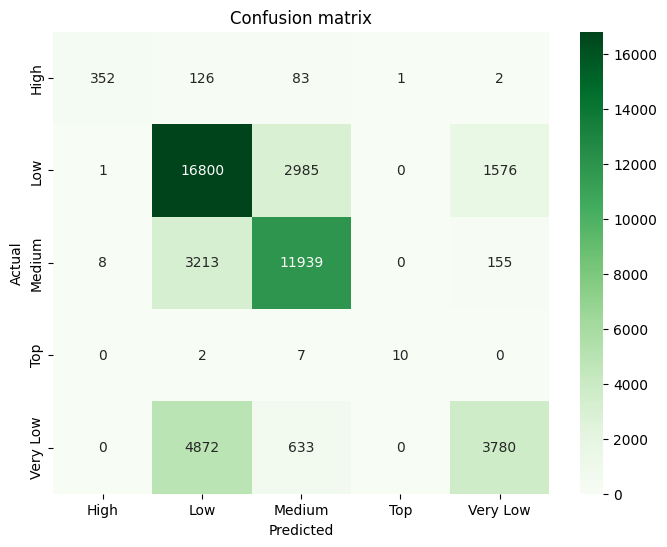

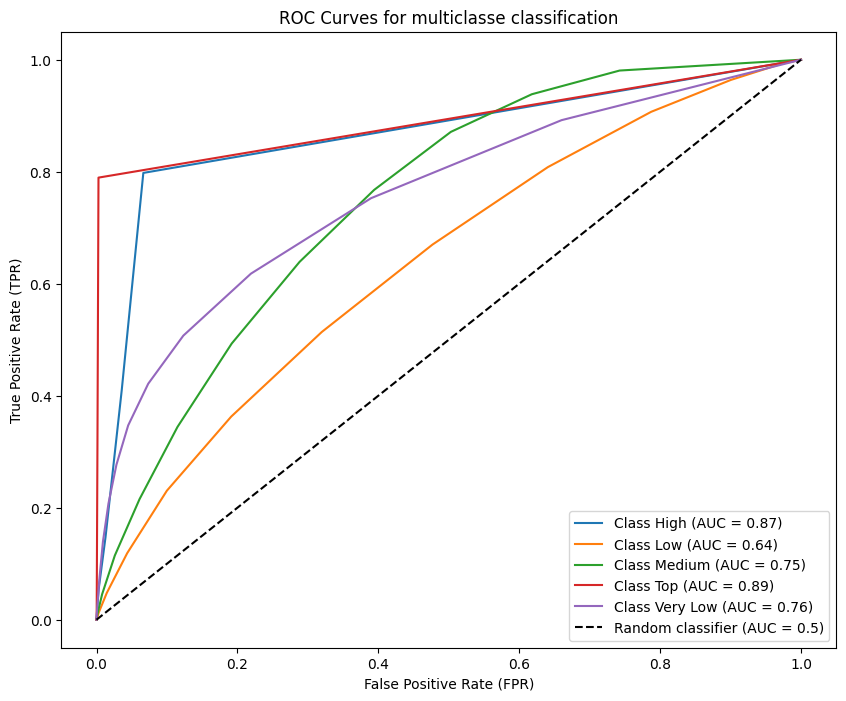

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=120, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=6, max_features='log2')
model_rf.fit(X_train_norm, y_train)
y_pred_rf = model_rf.predict(X_test_norm)


# classification metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for multiclasse classification')
plt.legend(loc='lower right')
plt.show()


Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict

# Cross validation
cv_scores = cross_val_score(model_rf, X_train_norm, y_train, cv=5, scoring='accuracy')

# Print results
print("Scores of cross validation:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

# Get predictions during cross-validation
y_pred_cv = cross_val_predict(model_rf, X_train, y_train, cv=5)

# Evaluate the predictions made during cross-validation
accuracy_cv = accuracy_score(y_train, y_pred_cv)
print(f"\nAccuracy (Cross-Validation) Random Forest: {accuracy_cv}")
print("Classification Report (Cross-Validation) Random Forest:")
print(classification_report(y_train, y_pred_cv))


Scores of cross validation: [0.68025567 0.68307552 0.68594908 0.68817811 0.68279844]
Mean Accuracy (Cross-Validation): 0.6840513631885398

Accuracy (Cross-Validation) Random Forest: 0.7146831812395598
Classification Report (Cross-Validation) Random Forest:
              precision    recall  f1-score   support

        High       0.95      0.56      0.71      2285
         Low       0.67      0.80      0.73     85883
      Medium       0.77      0.75      0.76     61331
         Top       0.97      0.41      0.58        88
    Very Low       0.73      0.46      0.57     36592

    accuracy                           0.71    186179
   macro avg       0.82      0.60      0.67    186179
weighted avg       0.72      0.71      0.71    186179



Save the model

In [43]:
joblib.dump(model_rf, "modelo_random_forest.pkl",compress=3)

['modelo_random_forest.pkl']

### 2.4 XG Boost

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5505
Precision: 0.5594
Recall: 0.5505
F1 Score: 0.5397

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.00      0.00       564
           1       0.53      0.69      0.60     21362
           2       0.54      0.48      0.51     15315
           3       0.00      0.00      0.00        19
           4       0.67      0.37      0.48      9285

    accuracy                           0.55     46545
   macro avg       0.41      0.31      0.32     46545
weighted avg       0.56      0.55      0.54     46545



C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

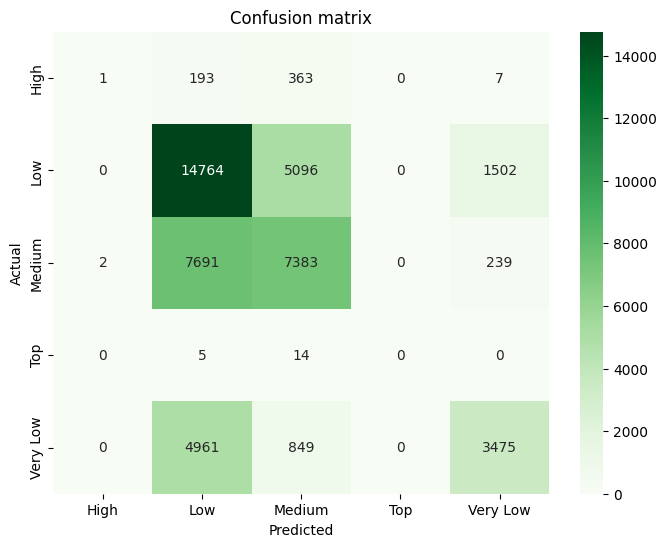

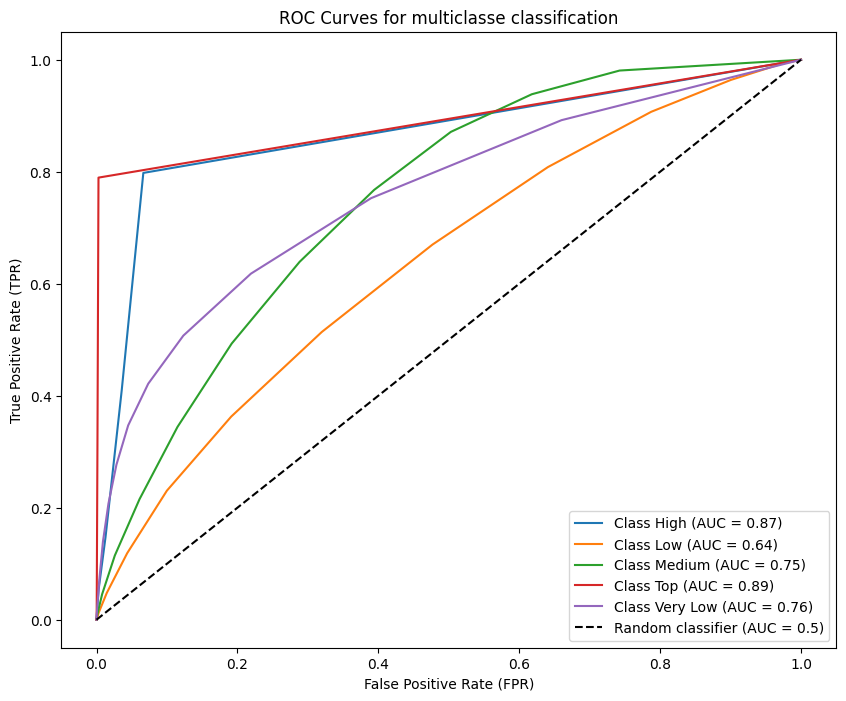

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Crear el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajustar el codificador de etiquetas a las clases de y_train y transformarlas
y_train_encoded = label_encoder.fit_transform(y_train)

# Asegúrate de hacer lo mismo con y_test si también lo necesitas
y_test_encoded = label_encoder.transform(y_test)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators = 10, seed = 42)
xgb_model.fit(X_train_norm, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test_norm)

# classification metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_encoded,y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_xgb))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for multiclasse classification')
plt.legend(loc='lower right')
plt.show()

### 2.5 Neural Networks

In [46]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [47]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=tf.shape(y_pred)[-1])  # Convertir etiquetas a one-hot
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)  # Evitar valores extremos

        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        return K.mean(weight * cross_entropy)

    return loss

In [48]:
# Convertir etiquetas categóricas a números
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# ponderation of classes

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(enumerate(class_weights))

C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5171 - loss: 0.0226 - val_accuracy: 0.5459 - val_loss: 0.0208 - learning_rate: 5.0000e-04
Epoch 2/100
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5422 - loss: 0.0209 - val_accuracy: 0.5449 - val_loss: 0.0207 - learning_rate: 5.0000e-04
Epoch 3/100
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5415 - loss: 0.0208 - val_accuracy: 0.5493 - val_loss: 0.0206 - learning_rate: 5.0000e-04
Epoch 4/100
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5423 - loss: 0.0208 - val_accuracy: 0.5412 - val_loss: 0.0206 - learning_rate: 5.0000e-04
Epoch 5/100
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5475 - loss: 0.0207 - val_accuracy: 0.5517 - val_loss: 0.0205 - learning_rate: 5.0000e-04
Epoch 6/100
5770/5819 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5485 - loss: 0.0207
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
5819/5819 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/

C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       564
           1       0.54      0.70      0.61     21362
           2       0.55      0.50      0.52     15315
           3       0.00      0.00      0.00        19
           4       0.69      0.38      0.49      9285

    accuracy                           0.56     46545
   macro avg       0.36      0.31      0.32     46545
weighted avg       0.57      0.56      0.55     46545



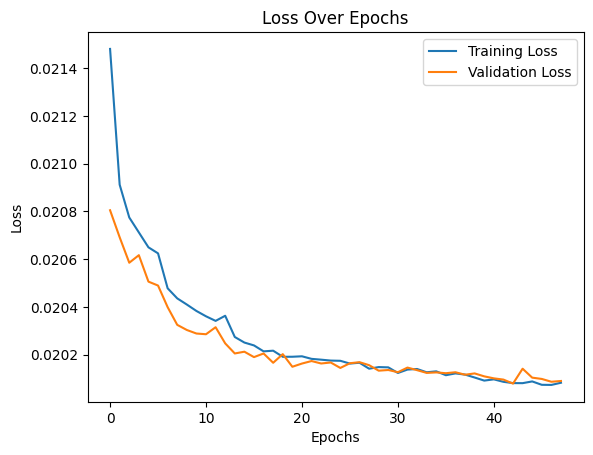

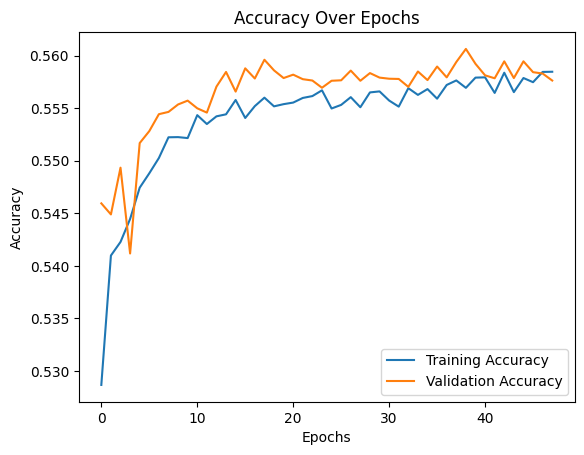

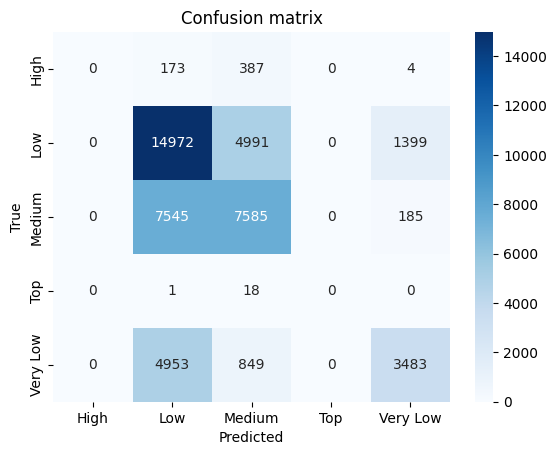

Codified classes: ['High' 'Low' 'Medium' 'Top' 'Very Low']


In [49]:
# model 
model = Sequential([
    Dense(256, activation = 'relu',input_shape=(X_train_norm.shape[1],)),
    Dropout(0.3),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Callbacks para EarlyStopping y reducción dinámica de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)


# copile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss=focal_loss(),
              metrics=['accuracy'])

# train the model
history = model.fit(
    X_train_norm, y_train_encoded,
    validation_data=(X_test_norm, y_test_encoded),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

# evaluate
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# report
y_pred = np.argmax(model.predict(X_test_norm), axis=1)
print(classification_report(y_test_encoded, y_pred))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()


# Mostrar clases codificadas
print("Codified classes:", label_encoder.classes_)

### 2.6 Ada Boost

C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5180
Precision: 0.5169
Recall: 0.5180
F1 Score: 0.5070


C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carlota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi


Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       564
         Low       0.51      0.66      0.57     21362
      Medium       0.50      0.45      0.48     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.58      0.35      0.43      9285

    accuracy                           0.52     46545
   macro avg       0.32      0.29      0.30     46545
weighted avg       0.52      0.52      0.51     46545



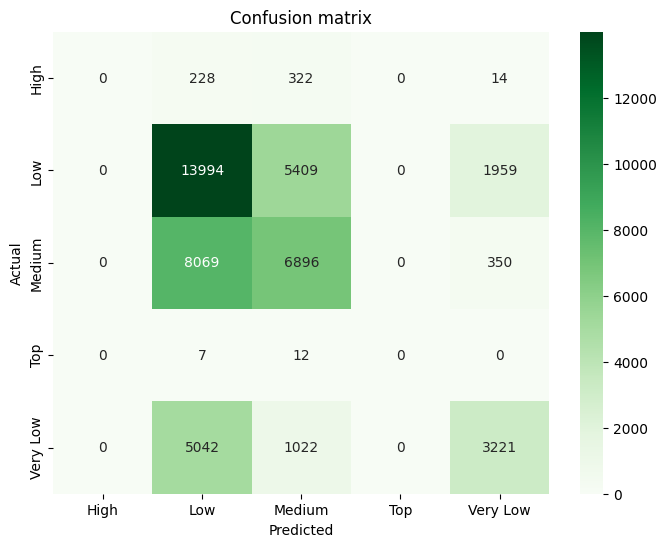

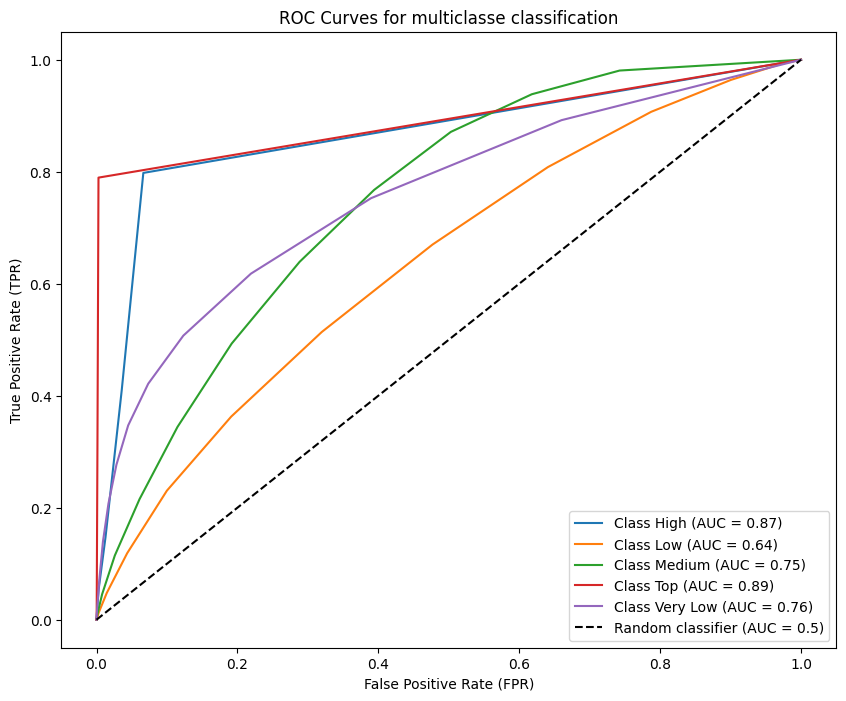

In [50]:
from sklearn.ensemble import AdaBoostClassifier
# train the model
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train_norm, y_train)

# predictions
y_pred_ada = ada_boost.predict(X_test_norm)

# classification metrics
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada, average='weighted')
recall = recall_score(y_test, y_pred_ada, average='weighted')
f1 = f1_score(y_test, y_pred_ada, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for multiclasse classification')
plt.legend(loc='lower right')
plt.show()